# CODING TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM BASIC EDA

In [1]:
# Import Key Libaries and datsets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached setuptools-61.2.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.5.0
    Uninstalling setuptools-59.5.0:
      Successfully uninstalled setuptools-59.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.5.10 requires setuptools==59.5.0, but you have setuptools 61.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 109.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0


In [3]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [4]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# import the csv files using pandas 
cancer_df = pd.read_csv('cancer.csv')


In [21]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
# Explore the first five rows in the DataFrame
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Explore the last five rows in the DataFrame
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [24]:
# Generate statistical summary
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [25]:
# Obtain dataset information
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

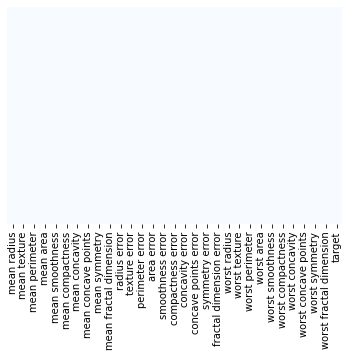

In [26]:
# check if there are any Null values
sns.heatmap(cancer_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [27]:
# check if there are any Null values
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

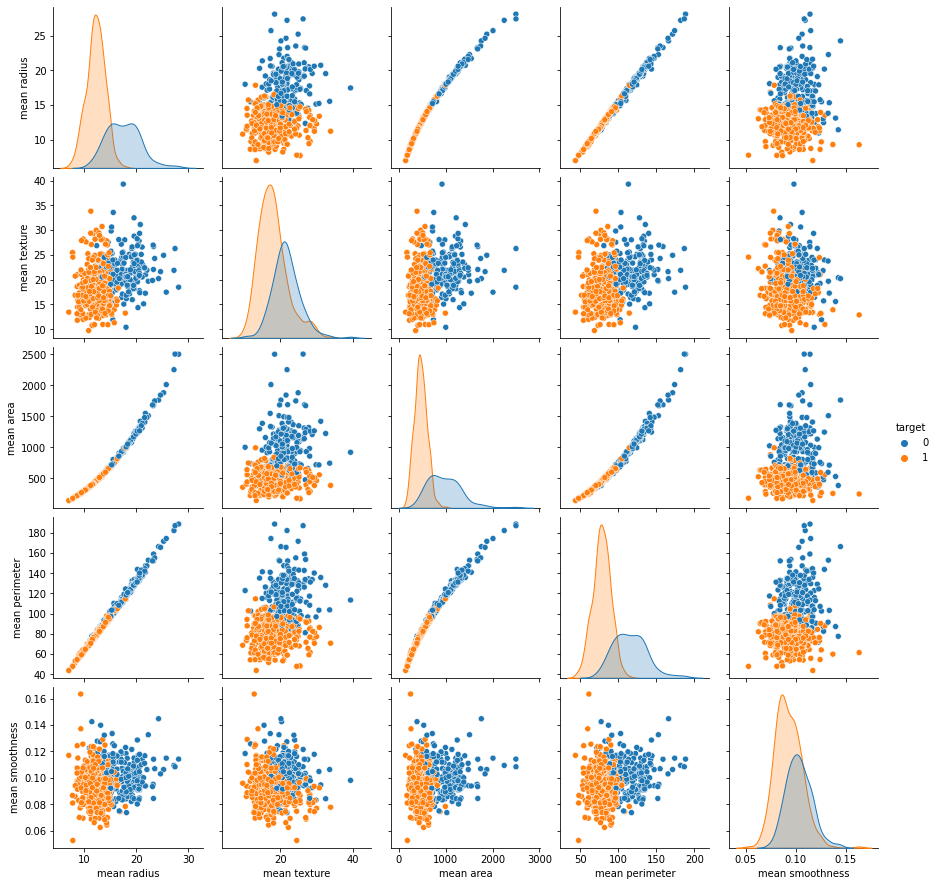

In [34]:
sns.pairplot(cancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] );

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

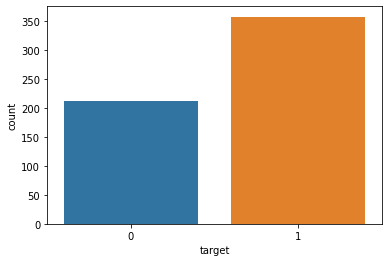

In [37]:
sns.countplot(cancer_df['target'], label = "Count"); 

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

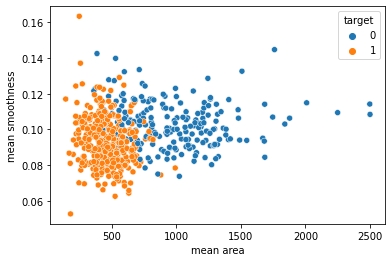

In [38]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df);

<AxesSubplot:>

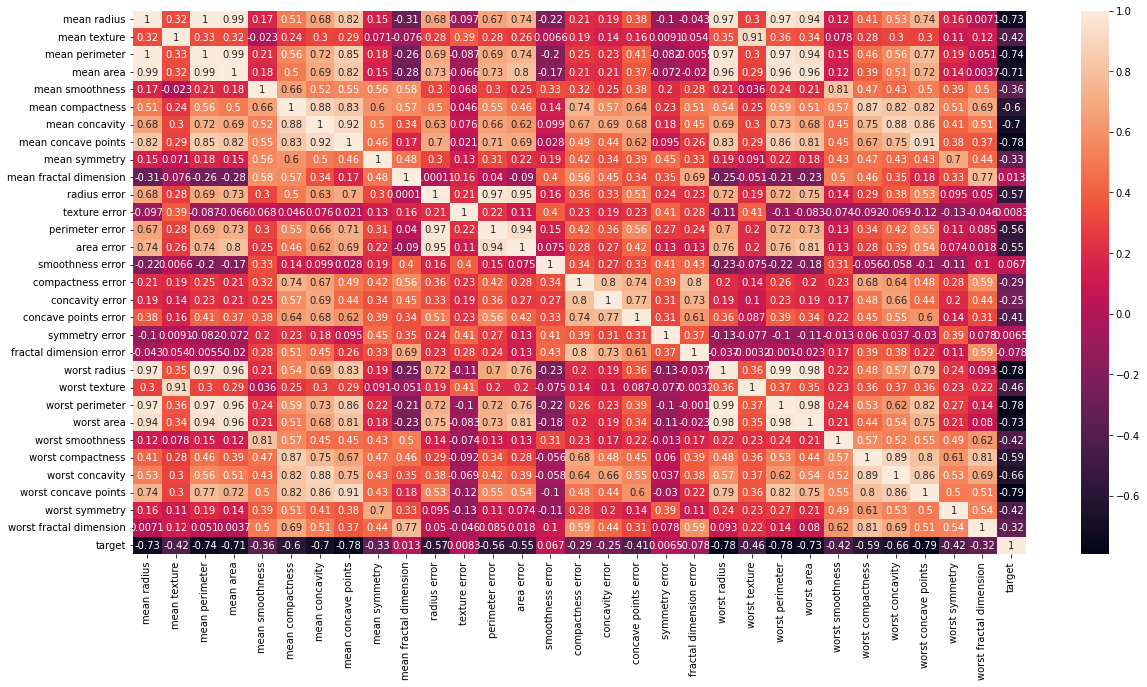

In [39]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.corr(), annot=True) 

In [40]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(cancer_df, test_size = 0.2, random_state = 0)

# CODING TASK #2: TRAIN MULTIPLE CLASSIFIERS USING AUTOGLUON (METRIC: ACCURACY, PRESET: OPTIMIZED FOR PERFORMANCE)

In [41]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
338,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664,1
427,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662,1
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012,1
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376,1
490,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750,0
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136,1
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559,1


In [42]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818,0
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,1
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,...,25.07,146.00,1479.0,0.16650,0.29420,0.53080,0.21730,0.3032,0.08075,0
516,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863,0


In [43]:
# Train multiple ML classifier models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label = "target", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220331_182606/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220331_182606/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    455
Train Data Columns: 30
Label Column: target
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2581.8 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 

In [44]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.982418       0.198844  30.459050                0.001238           0.802509            2       True         14
1    NeuralNetFastAI_BAG_L1   0.980220       0.172559  16.608542                0.172559          16.608542            1       True         10
2         LightGBMXT_BAG_L1   0.978022       0.014949   8.879530                0.014949           8.879530            1       True          3
3     NeuralNetTorch_BAG_L1   0.978022       0.140817  12.780689                0.140817          12.780689            1       True         12
4           CatBoost_BAG_L1   0.973626       0.015094  21.538846                0.015094          21.538846            1       True          7
5           LightGBM_BAG_L1   0.973626       0.021373  10.350498                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9230769230769231,
  'KNeighborsDist_BAG_L1': 0.9208791208791208,
  'LightGBMXT_BAG_L1': 0.978021978021978,
  'LightGBM_BAG_L1': 0.9736263736263736,
  'Ra

In [45]:
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.982418       0.198844  30.459050                0.001238           0.802509            2       True         14
1    NeuralNetFastAI_BAG_L1   0.980220       0.172559  16.608542                0.172559          16.608542            1       True         10
2         LightGBMXT_BAG_L1   0.978022       0.014949   8.879530                0.014949           8.879530            1       True          3
3     NeuralNetTorch_BAG_L1   0.978022       0.140817  12.780689                0.140817          12.780689            1       True         12
4           CatBoost_BAG_L1   0.973626       0.015094  21.538846                0.015094          21.538846            1       True          7
5           LightGBM_BAG_L1   0.973626       0.021373  10.350498                0.021373          10.350498            1       True          4

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.982418,0.198844,30.459050,0.001238,0.802509,2,True,14
1,NeuralNetFastAI_BAG_L1,0.980220,0.172559,16.608542,0.172559,16.608542,1,True,10
2,LightGBMXT_BAG_L1,0.978022,0.014949,8.879530,0.014949,8.879530,1,True,3
3,NeuralNetTorch_BAG_L1,0.978022,0.140817,12.780689,0.140817,12.780689,1,True,12
4,CatBoost_BAG_L1,0.973626,0.015094,21.538846,0.015094,21.538846,1,True,7
5,LightGBM_BAG_L1,0.973626,0.021373,10.350498,0.021373,10.350498,1,True,4
6,ExtraTreesEntr_BAG_L1,0.967033,0.121842,0.651438,0.121842,0.651438,1,True,9
7,XGBoost_BAG_L1,0.964835,0.034452,6.176196,0.034452,6.176196,1,True,11
8,RandomForestEntr_BAG_L1,0.964835,0.122288,0.735366,0.122288,0.735366,1,True,6
9,RandomForestGini_BAG_L1,0.962637,0.121439,0.927708,0.121439,0.927708,1,True,5


                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.982418       0.198844  30.459050                0.001238           0.802509            2       True         14
1    NeuralNetFastAI_BAG_L1   0.980220       0.172559  16.608542                0.172559          16.608542            1       True         10
2         LightGBMXT_BAG_L1   0.978022       0.014949   8.879530                0.014949           8.879530            1       True          3
3     NeuralNetTorch_BAG_L1   0.978022       0.140817  12.780689                0.140817          12.780689            1       True         12
4           CatBoost_BAG_L1   0.973626       0.015094  21.538846                0.015094          21.538846            1       True          7
5           LightGBM_BAG_L1   0.973626       0.021373  10.350498                0.021373          10.350498            1       True          4

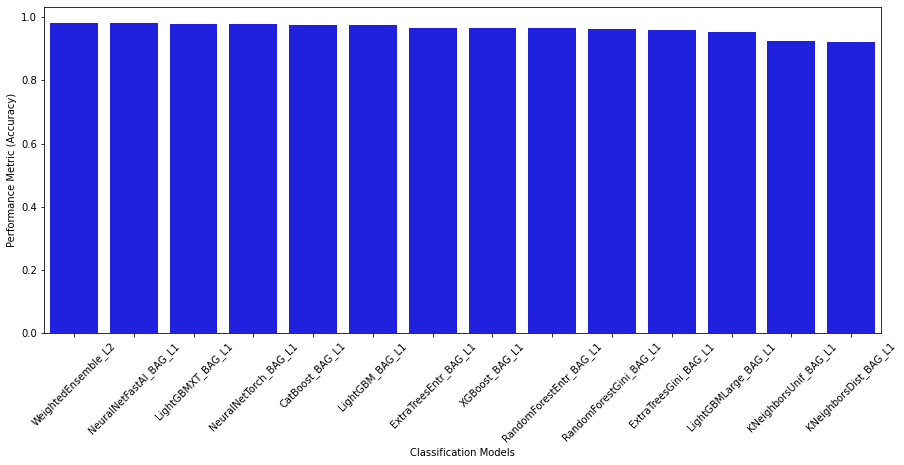

In [46]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [47]:
predictor.evaluate(X_test)

Evaluation: accuracy on test data: 0.9824561403508771
Evaluations on test data:
{
    "accuracy": 0.9824561403508771,
    "balanced_accuracy": 0.9787234042553192,
    "mcc": 0.9642067864854161,
    "roc_auc": 0.9977770720863767,
    "f1": 0.9852941176470589,
    "precision": 0.9710144927536232,
    "recall": 1.0
}


{'accuracy': 0.9824561403508771,
 'balanced_accuracy': 0.9787234042553192,
 'mcc': 0.9642067864854161,
 'roc_auc': 0.9977770720863767,
 'f1': 0.9852941176470589,
 'precision': 0.9710144927536232,
 'recall': 1.0}

In [48]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [0, 1, 1, 1, 1]


In [51]:
y_test = X_test['target']
y_test

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

<AxesSubplot:>

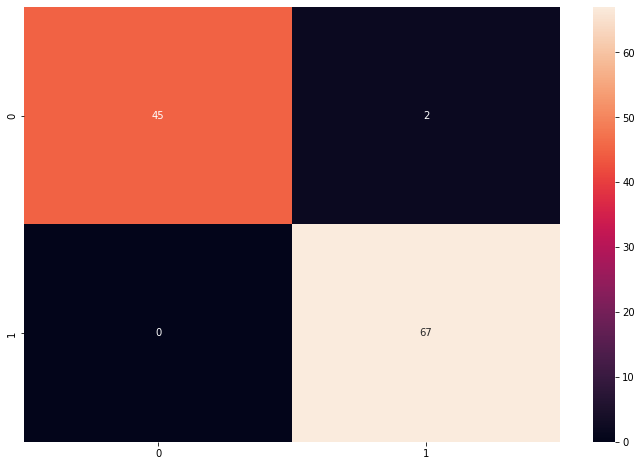

In [52]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# CODING TASK #3: TRAIN MULTIPLE CLASSIFIERS USING AUTOGLUON (METRIC: ROC_AUC, PRESET: OPTIMIZED FOR DEPLOYMENT)

In [54]:
predictor = TabularPredictor(label = "target", problem_type = 'binary', eval_metric = 'roc_auc').fit(train_data = X_train, time_limit = 400, presets = "optimize_for_deployment")


No path specified. Models will be saved in: "AutogluonModels/ag-20220331_184535/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 400s
AutoGluon will save models to "AutogluonModels/ag-20220331_184535/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    455
Train Data Columns: 30
Label Column: target
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2278.73 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerato

In [55]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      NeuralNetFastAI   0.996343       0.021351  0.711543                0.021351           0.711543            1       True          1
1  WeightedEnsemble_L2   0.996343       0.022741  2.333828                0.001390           1.622285            2       True          2
Number of models trained: 2
Types of models trained:
{'WeightedEnsembleModel', 'NNFastAiTabularModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', []) : 30 | ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', ...]
Plot summary of models saved to file: AutogluonModels/ag-20220331_184535/SummaryOfModels.html
*** End of fit() summary ***


{'model_types': {'NeuralNetFastAI': 'NNFastAiTabularModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetFastAI': 0.9963427377220482,
  'WeightedEnsemble_L2': 0.9963427377220482},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetFastAI': 'AutogluonModels/ag-20220331_184535/models/NeuralNetFastAI/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20220331_184535/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'NeuralNetFastAI': 0.711543083190918,
  'WeightedEnsemble_L2': 1.6222853660583496},
 'model_pred_times': {'NeuralNetFastAI': 0.021351099014282227,
  'WeightedEnsemble_L2': 0.0013895034790039062},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'num_classes': 2,
 'model_hyperparams': {'NeuralNetFastAI': {'layers': None,
   'emb_drop': 0.1,
   'ps': 0.1,
   'bs': 'auto',
   'lr': 0.01,
   'epochs': 'auto',
   'early.stopping.min_delta': 0.0001,
   'early.stopping.patience': 20,
   'smoothing': 0.0},
  'WeightedEnsemble_L2': {'use_o

In [56]:
predictor.leaderboard()

                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      NeuralNetFastAI   0.996343       0.021351  0.711543                0.021351           0.711543            1       True          1
1  WeightedEnsemble_L2   0.996343       0.022741  2.333828                0.001390           1.622285            2       True          2


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,0.996343,0.021351,0.711543,0.021351,0.711543,1,True,1
1,WeightedEnsemble_L2,0.996343,0.022741,2.333828,0.001390,1.622285,2,True,2


                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      NeuralNetFastAI   0.996343       0.021351  0.711543                0.021351           0.711543            1       True          1
1  WeightedEnsemble_L2   0.996343       0.022741  2.333828                0.001390           1.622285            2       True          2


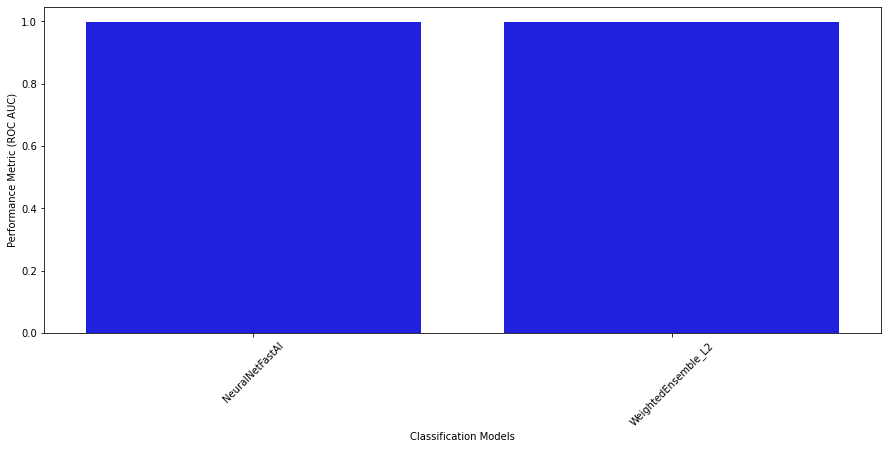

In [57]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (ROC AUC)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [58]:
predictor.evaluate(X_test)

Evaluation: roc_auc on test data: 0.9980946332168943
Evaluations on test data:
{
    "roc_auc": 0.9980946332168943,
    "accuracy": 0.9824561403508771,
    "balanced_accuracy": 0.9850746268656716,
    "mcc": 0.9646508824479533,
    "f1": 0.9848484848484849,
    "precision": 1.0,
    "recall": 0.9701492537313433
}


{'roc_auc': 0.9980946332168943,
 'accuracy': 0.9824561403508771,
 'balanced_accuracy': 0.9850746268656716,
 'mcc': 0.9646508824479533,
 'f1': 0.9848484848484849,
 'precision': 1.0,
 'recall': 0.9701492537313433}